# South African Language Identification Hack 2023



### Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

### The structure of this notebook is as follows

-Load data to get a clear understanding of our predictor and response variable that we will be modelling.
-Data Preprocessing
-Data engineering
-Train the  Modelling
-Hyperparemeter Tuning
-Validation
-Test the Model


### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import string

### The data set

In [2]:
train = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\train_set.csv")
test = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\test_set.csv")

In [3]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


**Note:** The feature we are tying to predict is the Lang_id

In [4]:
test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [5]:
pd.set_option('display.max_colwidth', None)

# Print the 'message' column
print(train['text'].tail(10))

32990               government has a long-term programme for the upgrading of ports of entry this includes an investment of r million to upgrade ict infrastructure at airports r billion for physical and ict infrastructure at land ports of entry and r million to upgrade sea ports of entry over the to period
32991                                      mo kgopelo e dirilwego go ya ka karolo ya go bea hlatswadiatla goba tshekoleswa kgahlanong le sephetho sa kgoro bjalo ka ge go hlaošitšwe ka go arolo yeo dikgontšhi tše dingwe tša molao wo di tla diragatšwa bjalo ka ge o ka re kgopelo goba tshekoleswa ga tša dirwa
32992                                               a umqondisi-jikelele azise umuntu okukhulunywa ngaye kumthethonkambiso- noma- ukuthi kusetshenziswa izinga lezokuvikela olwandle futhi b umqondisi-jikelele echitha leso simemezelo umqondisi-jikelele kufanele ngokushesha azise lowo muntu ngokuchithwa lokho
32993                                                                       

### Text cleaning- Train data

In [6]:
# Remove punctuation for all rows in the 'text' column

def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

train['text'] = train['text'].apply(lambda x: remove_punctuation(x) if pd.notnull(x) else x)


In [7]:
## converting all str to lower case
train['text'] = train['text'].str.lower()  
 #removing white spaces from left and right
train['text'] = train['text'].str.strip()

### Tokenasation
Break the text into individual words or tokens.

In [8]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
train['tokens'] = train['text'].apply(tokeniser.tokenize)
train['tokens'].iloc[1]

['idha',
 'iya',
 'kuba',
 'nobulumko',
 'bokubeka',
 'umsebenzi',
 'naphi',
 'na',
 'kwisebe',
 'ngokusekwe',
 'kwiimfuno',
 'zokusebenza',
 'zalo',
 'emva',
 'kokubonana',
 'nomsebenzi',
 'kunye',
 'okanye',
 'imanyano',
 'yakhe',
 'ukuba',
 'ulandulo',
 'lomntu',
 'onjalo',
 'alufanelekanga',
 'idha',
 'mayibize',
 'uncedo',
 'olufanelekileyo',
 'elungelweni',
 'layo']

### Stemming
Reduce words to their base or root form to standardize variations.Stemming may result in non-words.

In [9]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Create a stemmer object
stemmer = PorterStemmer()

# Stem the 'text' column and create a new column 'stemmed_text'
train['stemmed_text'] = train['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

# Row index for demonstration
row_index = 10

# Print original tokens and corresponding stemmed tokens for the specified row
for original, stemmed in zip(train.loc[row_index, 'tokens'], train.loc[row_index, 'stemmed_text'].split()):
    print('{:20s} --> {:10s}'.format(original, stemmed))

lapho                --> lapho     
inarha               --> inarha    
yangeqadi            --> yangeqadi 
ingenwe              --> ingenw    
ngokungasimthetho    --> ngokungasimthetho
begodu               --> begodu    
kunobujamo           --> kunobujamo
obukhethekileko      --> obukhethekileko
umnikazi             --> umnikazi  
wenarha              --> wenarha   
angaya               --> angaya    
kumasipala           --> kumasipala
wendawo              --> wendawo   
namkha               --> namkha    
nakutlhogekako       --> nakutlhogekako
emnyangweni          --> emnyangweni
wezezindlu           --> wezezindlu
ukufna               --> ukufna    
irhelebho            --> irhelebho 
nayikuthi            --> nayikuthi 
unobangela           --> unobangela
kufuna               --> kufuna    
izindlu              --> izindlu   


### Lemmatization 
  Lemmatizing is the process of grouping words of similar meaning together.Lemmatization tends to produce meaningful words, 

In [10]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Lemmatize the 'text' column and create a new column 'lemmatized_text'
train['lemmatized_text'] = train['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

# Print the lemmatized tokens for a specific row (e.g., index 268702)
row_index = 10
for i, t in enumerate(train.loc[row_index, 'tokens']):
    print('{:20s} --> {:10s}'.format(t, train.loc[row_index, 'lemmatized_text'].split()[i]))

lapho                --> lapho     
inarha               --> inarha    
yangeqadi            --> yangeqadi 
ingenwe              --> ingenwe   
ngokungasimthetho    --> ngokungasimthetho
begodu               --> begodu    
kunobujamo           --> kunobujamo
obukhethekileko      --> obukhethekileko
umnikazi             --> umnikazi  
wenarha              --> wenarha   
angaya               --> angaya    
kumasipala           --> kumasipala
wendawo              --> wendawo   
namkha               --> namkha    
nakutlhogekako       --> nakutlhogekako
emnyangweni          --> emnyangweni
wezezindlu           --> wezezindlu
ukufna               --> ukufna    
irhelebho            --> irhelebho 
nayikuthi            --> nayikuthi 
unobangela           --> unobangela
kufuna               --> kufuna    
izindlu              --> izindlu   


### Text feature extraction


###### N_GRAMS


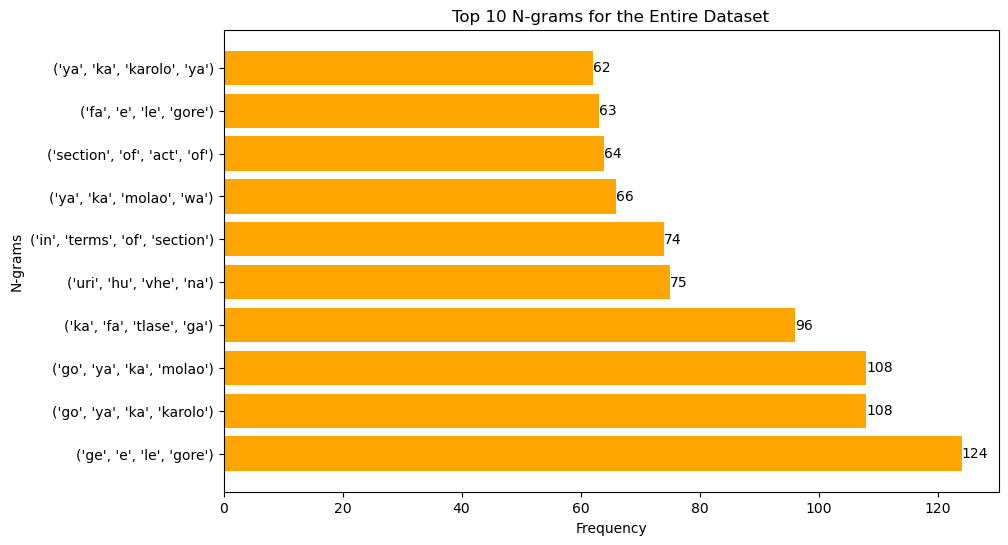

In [11]:
import pandas as pd
import nltk
from nltk.util import ngrams
from nltk import FreqDist
import matplotlib.pyplot as plt
from itertools import chain

# Load dataset
train = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\train_set.csv")

# Tokenize the entire dataset
all_words = list(chain.from_iterable(train['text'].apply(nltk.word_tokenize)))

# Generate n-grams (replace 4 with the desired n)
n_grams = list(ngrams(all_words, 4))

# Calculate the frequency distribution of n-grams
freq_dist = FreqDist(n_grams)

# Visualize the top n-grams using a bar chart
top_n = 10  # Set the number of top n-grams to display

# Get the top n-grams and their frequencies
top_n_grams = freq_dist.most_common(top_n)

# Extract labels and values for the bar chart
n_gram_labels, n_gram_values = zip(*[(str(gram), freq) for gram, freq in top_n_grams])

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.barh(range(top_n), n_gram_values, color='orange')

# Display frequency values on top of each bar
for bar, freq in zip(bars, n_gram_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(freq), ha='left', va='center')

plt.yticks(range(top_n), n_gram_labels)  # Set y-axis labels
plt.xlabel('Frequency')
plt.ylabel('N-grams')
plt.title(f'Top {top_n} N-grams for the Entire Dataset')
plt.show()

In [ ]:
train = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\train_set.csv")


### Vectorizer

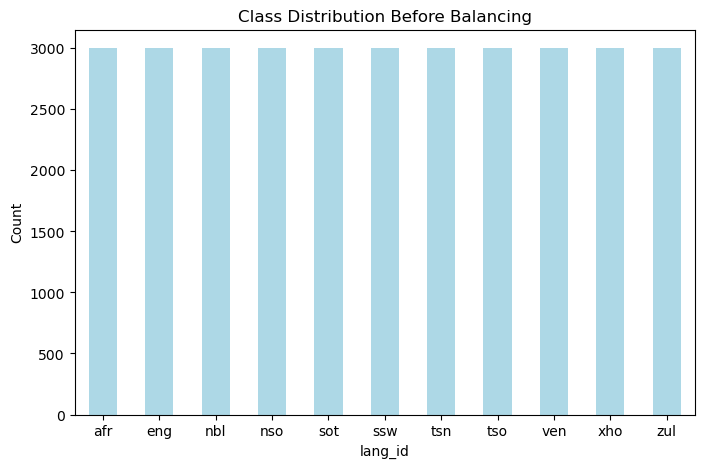

NameError: name 'rotation' is not defined

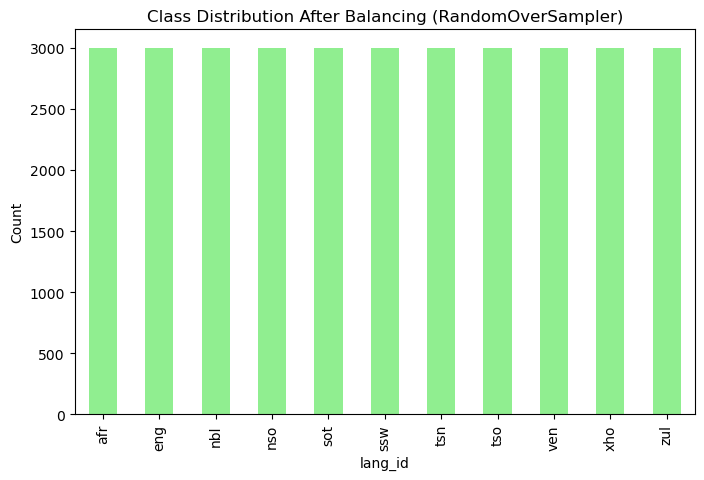

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'train'
# and it has a column 'processed_text' for features and 'text' for labels

# Vectorize the data for RandomOverSampler
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(train['text'])  # Assuming 'processed_text' is your feature column
y = train['lang_id']  # Assuming 'text' is your label column

# Visualize class distribution before balancing
plt.figure(figsize=(8, 5))
y.value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title('Class Distribution Before Balancing')
plt.xlabel('lang_id')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


# Vectorize the test set data
X_test = tfidf_vectorizer.transform(test['text'])  # Assuming 'processed_text' in the test set

# Visualize class distribution after balancing
plt.figure(figsize=(8, 5))
y.value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Class Distribution After Balancing (RandomOverSampler)')
plt.xlabel('lang_id')
plt.ylabel('Count')
plt.xticks(rotation)

### Data Preprocessing

we will insert the a column of meaning of Lang_id so lang id can have a fukk name idendification

In [14]:
file_path = r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\train_set.csv"


# Mapping between language categories and meanings
language_mapping = {
    'xho': 'isiXhosa',
    'zul': 'isizulu',
    'eng': 'english',
    'ven': 'tshivenda',
    'tso': 'xitsonga',
    'ssw': 'siswati',
    'stn': 'setswana',
    'afr': 'Afrikaans',
    'nbl': 'isindebele',
    'nso': 'sepedi',
    'sot': 'sesotho',
   
    # Add more mappings as needed
}

# Add a column with language meanings based on the mapping
train['lang_id_meaning'] = train['lang_id'].map(language_mapping)

# Print the DataFrame with the new column
print(train)

      lang_id  \
0         xho   
1         xho   
2         eng   
3         nso   
4         ven   
...       ...   
32995     tsn   
32996     sot   
32997     eng   
32998     xho   
32999     sot   

                                                                                                                                                                                                                                                                                                             text  \
0                                                                                    umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika   
1                                                    i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenz

### Text Cleaning-  Test data

In [13]:
# Remove punctuation for all rows in the 'text' column

def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

test['text'] = test['text'].apply(lambda x: remove_punctuation(x) if pd.notnull(x) else x)

## converting all str to lower case
test['text'] = test['text'].str.lower()  
 #removing white spaces from left and right
test['text'] = test['text'].str.strip()


### Exploratory Data Analysis

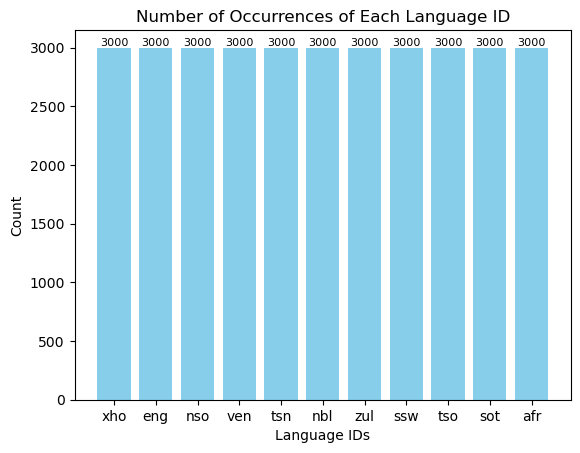

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'lang_id' is the column in your DataFrame
lang_id_counts = train['lang_id'].value_counts()

# Plotting the bar graph with counts
plt.bar(lang_id_counts.index, lang_id_counts.values, color='skyblue')
plt.xlabel('Language IDs')
plt.ylabel('Count')
plt.title('Number of Occurrences of Each Language ID')

# Adding counts on top of each bar
for i, v in enumerate(lang_id_counts.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8)

plt.show()

**insight** the data frame contains an equal amount of entries the each of the 11 diffrent languages

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'text_column' is the column containing text data
text_data = train['text']

# Instantiate CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
text_matrix = vectorizer.fit_transform(text_data)

# You can use 'text_matrix' as features for your model

### Model Training

In [20]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load your training dataset
train = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\train_set.csv")
test = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\test_set.csv")

# Assuming 'text' is the column containing text data in both training and test sets
text_data_train = train['text']
text_data_test = test['text']

# Instantiate CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_train = vectorizer.fit_transform(text_data_train)
X_test = vectorizer.transform(text_data_test)

# Assuming 'lang_id' is the target column in your training set
y_train = train['lang_id']

# Define and train multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluate models and print predictions
for model_name, model in models.items():
    # Train the model on the full training set
    model.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print model name and predictions
    print(f'{model_name} Predictions:\n{y_pred}\n{"="*40}')

C:\Users\Victoria Sema\anaconda3\New anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Predictions:
['ssw' 'nbl' 'xho' ... 'sot' 'sot' 'ssw']
Decision Tree Predictions:
['xho' 'xho' 'ven' ... 'sot' 'sot' 'nbl']
Random Forest Predictions:
['tsn' 'zul' 'ven' ... 'sot' 'sot' 'zul']
SVM Predictions:
['ssw' 'nbl' 'xho' ... 'sot' 'sot' 'ssw']
K-Nearest Neighbors Predictions:
['nbl' 'ssw' 'zul' ... 'sot' 'sot' 'zul']


In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

train = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\train_set.csv")
test = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\test_set.csv")

# Assuming 'text' is the column containing text data in both training and test sets
text_data_train = train['text']
text_data_test = test['text']

# Instantiate CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_train = vectorizer.fit_transform(text_data_train)
X_test = vectorizer.transform(text_data_test)

# Assuming 'lang_id' is the target column in your training set
y_train = train['lang_id']

# Define and train multiple models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train models on the full training set and make predictions on the test set
for model_name, model in models.items():
    # Train the model on the full training set
    model.fit(X_train, y_train)
    
    # Predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print classification report for the training set
    report = classification_report(y_train, model.predict(X_train))
    print(f"Classification Report for {model_name} on Train Set:\n{report}\n{'='*40}")

C:\Users\Victoria Sema\anaconda3\New anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression on Train Set:
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00      3000
         eng       1.00      1.00      1.00      3000
         nbl       1.00      1.00      1.00      3000
         nso       1.00      1.00      1.00      3000
         sot       1.00      1.00      1.00      3000
         ssw       1.00      1.00      1.00      3000
         tsn       1.00      1.00      1.00      3000
         tso       1.00      1.00      1.00      3000
         ven       1.00      1.00      1.00      3000
         xho       1.00      1.00      1.00      3000
         zul       1.00      1.00      1.00      3000

    accuracy                           1.00     33000
   macro avg       1.00      1.00      1.00     33000
weighted avg       1.00      1.00      1.00     33000

Classification Report for Decision Tree on Train Set:
              precision    recall  f1-score   support

         afr      

Since the the classes are evenly distributed therefore the scores for each languade_id are the same, therefore SVC will be used as best model

### Hyperparameter Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Load your training dataset
train = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\train_set.csv")

# Assuming 'text' is the column containing text data
text_data_train = train['text']

# Instantiate CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_train = vectorizer.fit_transform(text_data_train)
y_train = train['lang_id']

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Create an SVC model
svc_model = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Use the best parameters to instantiate the final SVC model
best_svc_model = SVC(**grid_search.best_params_)

# Train the final model on the full training set
best_svc_model.fit(X_train, y_train)


### Saving the best model

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC

# Load your training and test datasets
train = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\train_set.csv")
test = pd.read_csv(r"C:\Users\Victoria Sema\Downloads\south-african-language-identification-hack-2023\test_set.csv")

# Assuming 'text' is the column containing text data in both training and test sets
text_data_train = train['text']
text_data_test = test['text']

# Instantiate CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X_train = vectorizer.fit_transform(text_data_train)
X_test = vectorizer.transform(text_data_test)

# Assuming 'lang_id' is the target column in your training set
y_train = train['lang_id']

# Instantiate the SVM model with the best parameters
svc_model = SVC(C=1.0, kernel='rbf')

# Train the SVM model on the full training set
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = svc_model.predict(X_test)

# Create a DataFrame with 'index' and predicted 'lang_id' for the SVM model
output_svm = pd.DataFrame({'index': test.index + 1, 'lang_id': y_pred_test})

# Save the predictions to a CSV file
output_svm.to_csv('svm_test_predictions.csv', index=False)